# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

sinasc = pd.read_csv('sinasc_RO_2019.csv', sep = ',')
sinasc.sample(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
16639,1,2515768.0,110010,1,25,2.0,8 a 11 anos,421125.0,0.0,0.0,...,5,1483189,ATIVO,MUNIC,Nova Mamoré,Rondônia,-10.41177,-65.32915,151.0,10071.643
8013,1,4001303.0,110020,1,18,1.0,8 a 11 anos,999992.0,1.0,0.0,...,9,8077,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
23508,1,3970442.0,110020,1,32,5.0,8 a 11 anos,999992.0,4.0,0.0,...,5,1490126,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
14126,1,2515520.0,110002,1,32,2.0,8 a 11 anos,999992.0,2.0,1.0,...,5,1480660,ATIVO,MUNIC,Cacaulândia,Rondônia,-10.33887,-62.90319,161.0,1961.778
5657,1,2516047.0,110018,1,26,2.0,12 anos ou mais,NaN,0.0,0.0,...,5,5687,ATIVO,MUNIC,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [38]:
sinasc['APGAR5'].isna().sum()

103

In [39]:
sinasc.dropna(subset=['APGAR5'], inplace=True)

In [40]:
sinasc['APGAR5'].isna().sum()

0

In [41]:
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'class_APGAR5' ] = 'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'class_APGAR5' ] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'class_APGAR5' ] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'class_APGAR5' ] = 'asfixia grave'

In [42]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,class_APGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [57]:
ordem_categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas','42 semanas e mais']
sinasc = sinasc.set_index('GESTACAO').loc[ordem_categorias].reset_index()

<IPython.core.display.Javascript object>


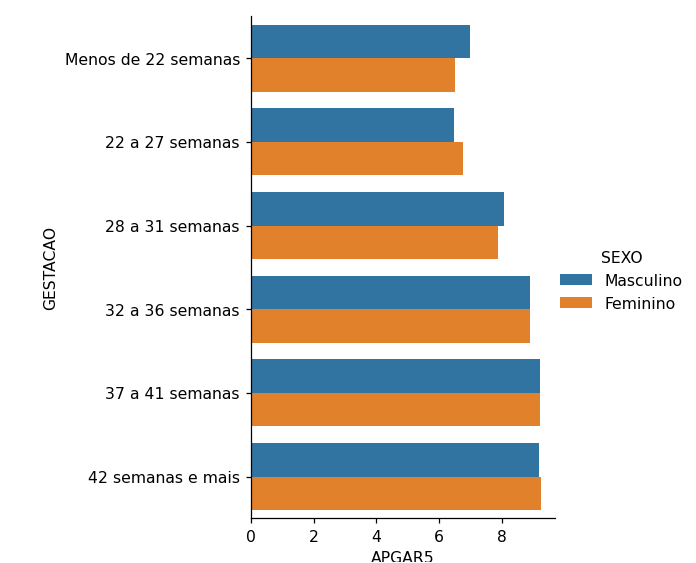

In [58]:
    sns.catplot(x = 'APGAR5', y = 'GESTACAO' , hue = 'SEXO', kind = 'bar', data = sinasc , ci = None)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [60]:
tab = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
tab = tab.reindex(ordem_categorias)

tab

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [61]:
freq_pctlin = tab.div(tab.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<IPython.core.display.Javascript object>


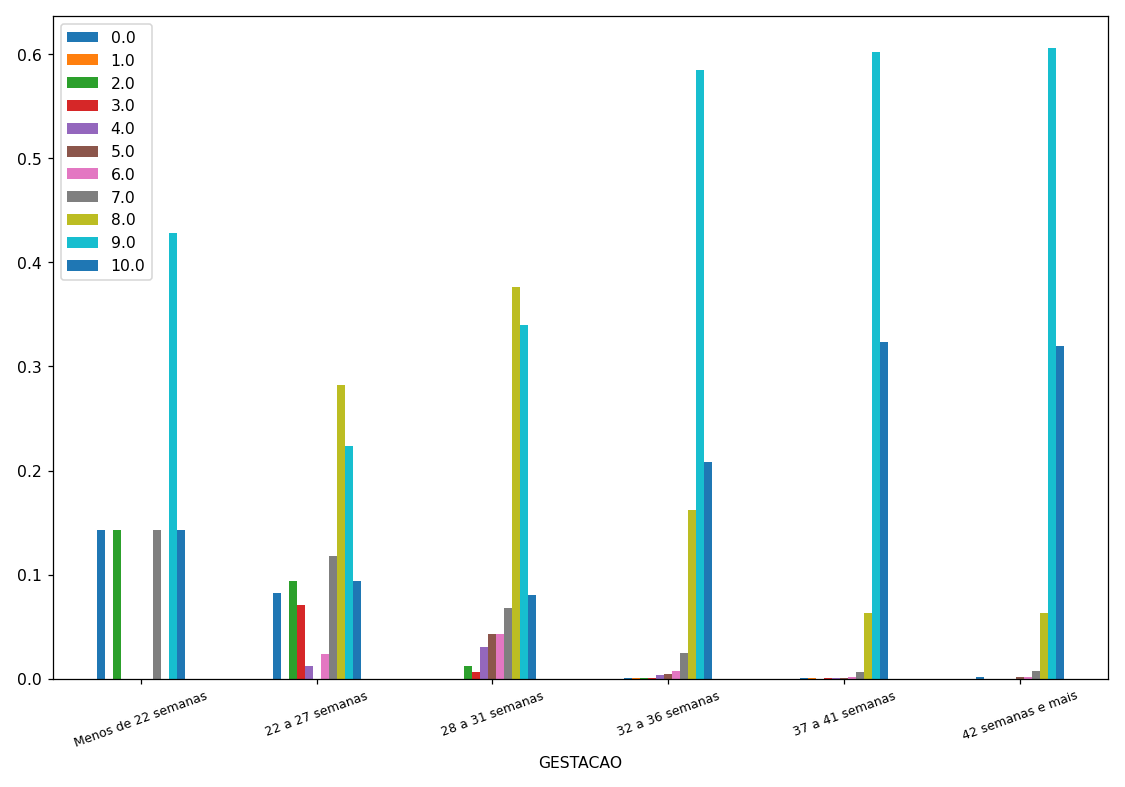

In [67]:
ax = freq_pctlin.plot.bar(legend = True, figsize = (10, 7))
ax.tick_params(axis='x', labelrotation=20, labelsize=8)
ax.legend(loc = 'best')


plt.tight_layout()


#Os dados corroboram com as classificações médicas, já que a frequência de partos com APGAR5 9 e 10 (partos considerados mais saudáveis) estão concentrados,
#em sua maioria, quando o bebê tem mais de 32 semanas, sendo que o resultado do APGAR5 de número 10 aumenta muito das categorias 
# 33-36 semanas para 37+ semanas, mostrando que é um bebê muito mais saudável e um parto mais tranquilo. Dessa forma, podemos 
#entender que quanto menor o APGAR5 mais em risco está o bebê e bebês prematuros tendem a ter mais risco do que bebês com mais de 37 semanas.
#A única exceção são os bebês com menos de 22 semanas, mas os outros números de APGAR5 são bem mais baixos do qualquer outra categoria, assim,
#essa anomalia deve ser mais bem explorada através do estudo e análise de outros dados e explicações científicas para compreender os números
#mais altos de casos de APGAR5 9. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<IPython.core.display.Javascript object>


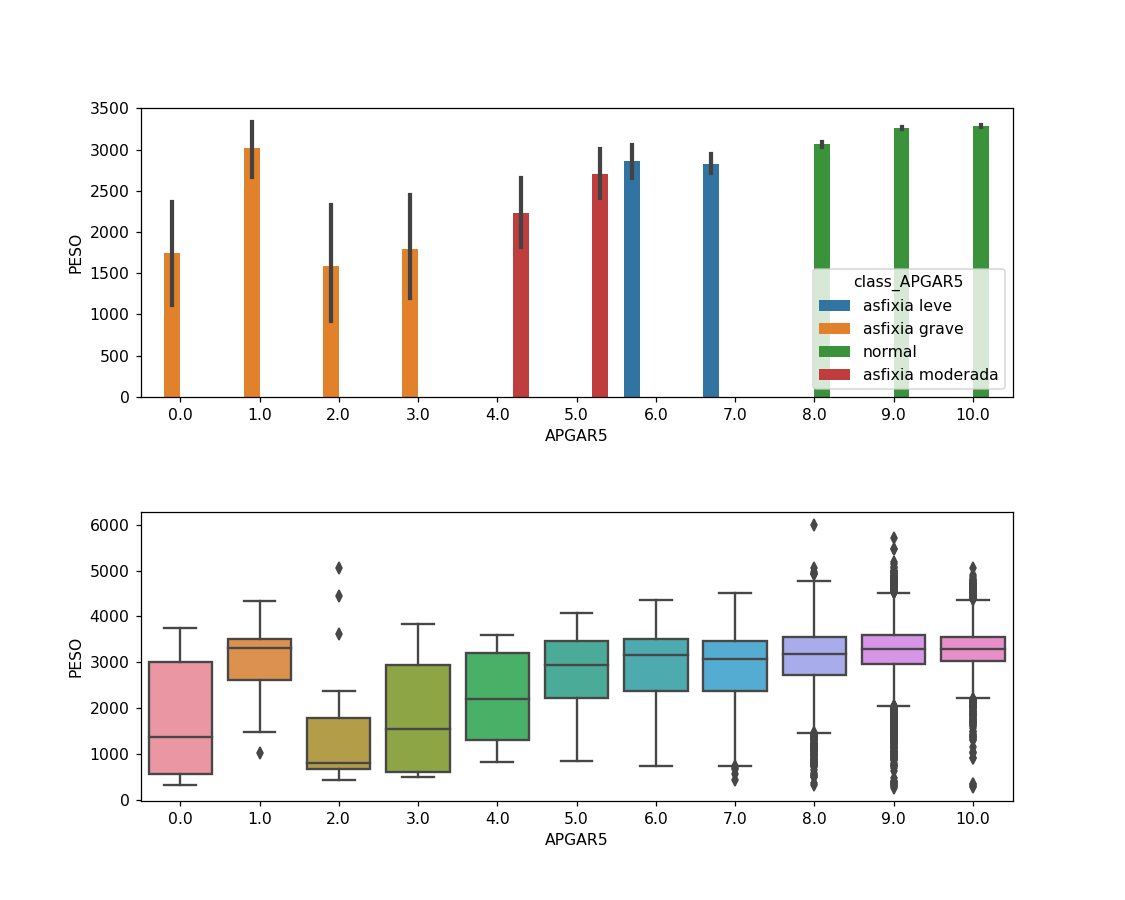

In [68]:
plt.close('all')

plt.rc('figure', figsize = (10,8))
fig, axes = plt.subplots(2,1)

sns.barplot(data=sinasc, x='APGAR5', y='PESO', hue = 'class_APGAR5', ax=axes[0])
sns.boxplot(x = 'APGAR5'
                , y = 'PESO'
                , data = sinasc            
               )

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)



#Existe sim uma relação entre o APGAR5 e o peso do bebê. Os bebês com APGAR5 mais altos (9 e 10) estão nas faixa dos 3 a 4 kg,enquanto 
#bebês com APGAR5 mais baixos tendem a ter uma disparidade maior de pesos e muitos deles abaixo dos 3 kg.

In [ ]:
#Aqui eu só estava comparando a faixa do APGAR5 1 e 7, pois achei parecido a faixa de peso, é interessante notar que o número de 
#bebês com APGAR5 7 aparece com mais frequência em bebês prematuros do que o APGAR5 1, o que pode explicar o porque da faixa de pesos do APGAR5 7 ter
# pesos menores em sua faixa, já que bebês prematuros são mais leves. Além do APGAR5 7 aparecer em com mais frequência outras faixas de gestação, por isso a variedade de pesos.
# Já a categoria 01 tem menos frequência, por isso que a quantidade de gestações mais avançadas que tem o APGAR5 01,  acaba aumentando a faixa de peso dessa categoria.

In [19]:
(sinasc[sinasc['APGAR5'] == 1].PESO > 3000).sum()

15

In [20]:
(sinasc[sinasc['APGAR5'] == 1].PESO).describe()

count      24.000000
mean     2966.041667
std       968.415312
min       935.000000
25%      2437.500000
50%      3310.000000
75%      3558.750000
max      4345.000000
Name: PESO, dtype: float64

In [21]:
(sinasc[sinasc['APGAR5'] == 7].PESO).describe()

count     241.000000
mean     2809.954357
std       928.459743
min       425.000000
25%      2355.000000
50%      3060.000000
75%      3470.000000
max      4505.000000
Name: PESO, dtype: float64

<IPython.core.display.Javascript object>


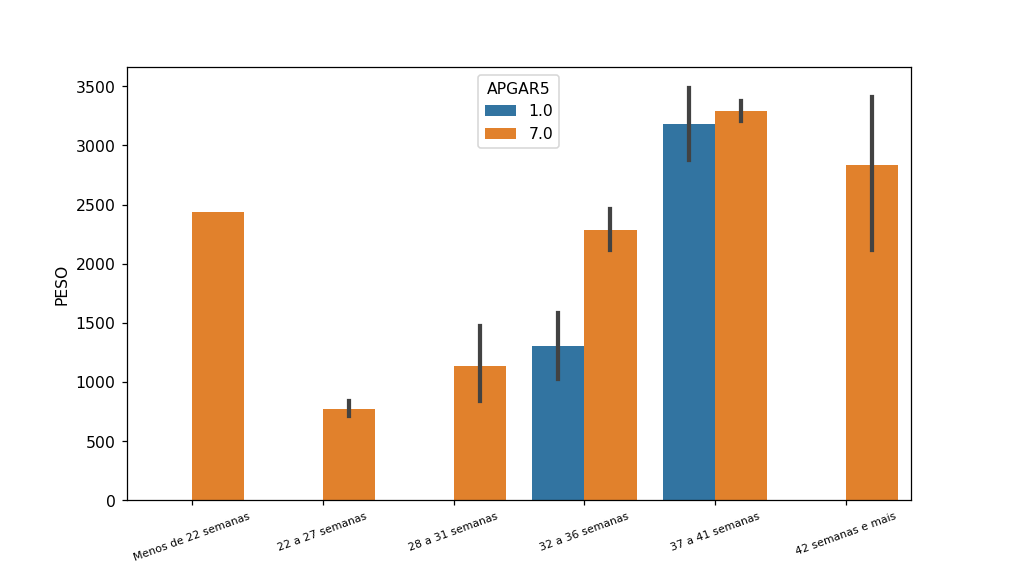

In [69]:
comp = pd.concat([sinasc[sinasc['APGAR5'] == 7],sinasc[sinasc['APGAR5'] == 1]])

plt.close('all')

plt.rc('figure', figsize = (9,5))
comp_t = sns.barplot(x = 'GESTACAO', y = 'PESO', hue = 'APGAR5', data = comp)
comp_t.tick_params(axis='x', labelrotation=20, labelsize=7)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

<IPython.core.display.Javascript object>


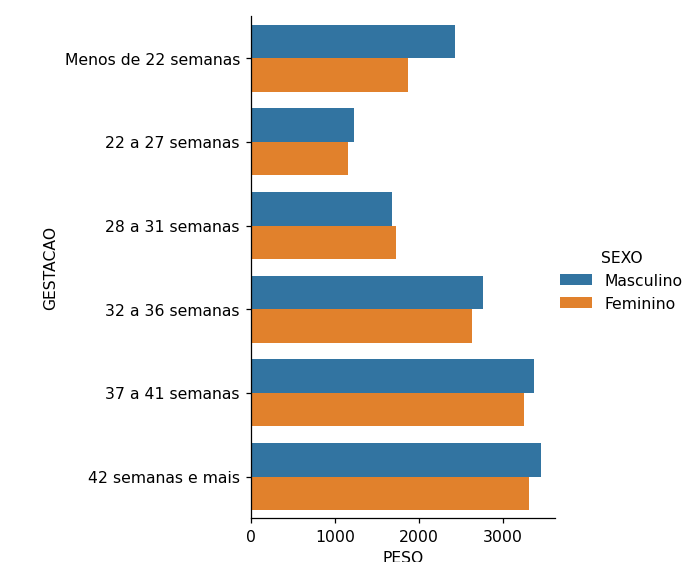

In [70]:
    sns.catplot(x = 'PESO', y = 'GESTACAO' , hue = 'SEXO', kind = 'bar', data = sinasc , ci = None)